# Probabilistic moment tensor inversions<br/>

In this notebook, we investigate various probabilistic centroid-moment tensor inversion strategies. Specifically, we compare various *Markov-chain Monte Carlo (MCMC)* inversion approaches: we evaluate the performance of Metropolis-Hastings, Hamiltonian Monte Carlo, and the ZigZag sampler. To properly assess and compare these sampling strategies, we consider moment tensors associated with a number of different source types and/or source characteristics. We investigate the different Markov chains in the context of induced seismicity. We therefore consider the Kwintsheul geothermal reservoir (Muntendam-Bos et al., 2022). We simulate the wavefield emanating from an induced seismic source within the exploited sandstone reservoir, and compute the seismograms at the locations of the seismic stations constituting the Kwintsheul seismic array (details are provided below).    

A *moment tensor* (MT) is a three by three tensor containing six independent parameters. It is obtained by assuming the seismic source to be a spatial point source. The position of the seismic source in the medium is referred to as the *centroid*. Moment tensor representations of seismic sources are particulary useful because they linearise the *forward problem* of seismic wave excitation. For further details regarding moment tensor representations we refer, among others, to Jost & Herrmann (1989), Julian et al. (1998), and Eyre & van der Baan (2015). 

Two different subsurface are used to compare and assess the performance of the different algorithms. The first being purely elastic, uniform, isotropic; the second subsurface is also isotropic, but vertically heterogenous and dissipative. For both media the *Green's functions*, which contain the subsurface' response to a point source, can be computed analytically. For the elastic, uniform medium it suffices to know P- and S-wave velocity (or Lamé's parameters and density). For the dissipative, layered medium, these need to be known for each layer separately, including the layers' quality factors. Prior to introducing the probabilistic algorithms, we (i) describe the forward problem, (ii) detail the two velocity models considered, (iii) introduce the Kwintsheul seismic array, (iv) compute the Green's functions, and (v) generate synthetic recordings of the induced seismic wavefield.


## 1. The forward problem

In the context of induced seismicity, time-dependent surface displacement is generally recorded by arrays of three-component surface seismometers. Let us denote the recorded surface displacement by $\mathbf{u}$ (a vector quantity) and the seismometer location by $\mathbf{x}$. Assuming the displacement to be accurate at periods for which the induced seismic source is effectively a point source, $\mathbf{u}$ can be expressed as a temporal convolution between the spatial derivative (with respect to the source coordinates $\boldsymbol{\xi}=(\xi_1,\xi_2,\xi_3)$) of the elastic *Green's function* $\mathbf{G}$ and the moment tensor $\mathbf{M}$. Mathematically, this can be written as
$$
u_{n}(\mathbf{x},t)=\sum_{p=1}^{3} \sum_{j=1}^{3} G_{n p, j}(\mathbf{x},t;\boldsymbol{\xi}^{(0)},0) * M_{p j}(\boldsymbol{\xi}^{(0)},t),
$$
where the subscripts $n$, $p$ and $j$ take on values 1, 2, or 3 and are associated with the $x_1$, $x_2$ and $x_3$ coordinate axes. The comma denotes spatial differentiation. Often, a local geographic coordinate system is used to define a Cartesian system tensor, with positive $x_1$ being northward, positive $x_2$ eastward, and positive $x_3$ being downward (NED). <!--Above, Einstein's summation convention applies and hence the right-hand side contains an implicit summation over 9 components of the moment tensor.-->

### The Green's function

Although often referred to as the Green's "function", the wavefield at $\mathbf{x}$ due to an impulsive source at $\boldsymbol{\xi}^{(0)}$ is effectively represented by a nine-component tensor: for each of the unidirectional impulsive (delta function) forces (one in each of the three Cartesian directions) at $\boldsymbol{\xi}^{(0)}$, the wavefield at $\mathbf{x}$ has three components ($u_1$, $u_2$, and $u_3$). A medium's Green's function captures all wave-propagation related physics between source and receiver. Obviously, an accurate velocity model is required in order to accurately compute Green's functions. Inaccurate velocity models can be a major limitation when it comes to seismic source characterization. 

<br>
<center>
    <figure>
        <img src="./FIGURES/greens_function.png" width="100%"/>
        <figcaption class="figure-caption text-left"><i>Example of a Green's function computed for the velocity model below Groningen. The impulsive source is is located at the left and the wavefield is (in this case) "recorded" in the middle of the Groningen gas reservoir</i></figcaption>
    </figure>
</center>

***ToDo: Describe double couples***

<br>
<center>
    <figure>
        <img src="./FIGURES/double_couples.png" width="50%"/>
        <figcaption class="figure-caption text-left"><i>Double couples associated with each of the nine moment tensor compoentens.</i></figcaption>
    </figure>
</center>

### Moment tensor description of a seismic source


***ToDo: Describe relation between source type and moment tensor. In particular, explain the relation between faulting types and moment tensor. Don't forget to introduce strike, dip, and rake. Although the figure will only be shown further below***
***

<center>
    <figure>
        <img src="./FIGURES/faulting.png" width="60%"/>
        <figcaption class="figure-caption text-left"><i>Moment tensors and  </i></figcaption>
    </figure>
</center>

<center>
    <figure>
        <img src="./FIGURES/beachballs.png" width="60%"/>
        <figcaption class="figure-caption text-left"><i>Moment tensors and  </i></figcaption>
    </figure>
</center>

### Moment magnitude

We mentioned above that at sufficiently long periods, a seismic source can be represented by a so-called moment tensor. The moment tensor description of a seismic source effectively collapses this source to a single point in the subsurface (point source assumption). The moment tensor is symmetric, and hence has six independent elements. The so-called *scalar moment* provides an estimate of the strenght of a seismic source (Silver & Jordan, 1982):
$$
M_{0} \equiv \sqrt{\sum_{i=1}^{3} \sum_{j=1}^{3} M_{ij}^{2}}/\sqrt{2}
$$

Importantly, Kanamori (1977) based a magnitude scale on the seismic moment of an earthquake. This magnitude is referred to as the *moment magnitude*, and is usually denoted by $M_W$. It is the only physics-based earthquake magnitude scale and therefore fundamentally different from empirical magnitude scales such as Richter's magnitude scale (which is usually referred to as the local magnitude and denoted by $M_L$). The moment magnitude is related to $M_0$ by (Kanamori, 1977),
$$
log(M_0) = 1.5 M_W + 9.1.
$$

## 2. Velocity models

To showcase the differences between the various Markov chain samplers, we use two simple models of the subsurface below Kwintsheul. First, we consdider a purely uniform medium; second, a relativaly simple vertically heterogeneous velocity model. In both subsurface models, the wavefield can be computed analytically. 


### I: A uniform subsurface

The first velocity model we consider is in fact the most simple model one can consider. That is, it is uniform, isotropic, and purely elastic (no dissipation). As a consequence, it is fully characterized by its P- and S-wave velocity (or Lamé's parameters and density). A uniform medium implies that all waves emitted from the source radiate spherically, and propagate along straight rays.


### II: A vertically heterogeneous subsurface

A vertically heterogeneous velocity model implies a stack of horizontal layers. For such a layered medium, P- and S-wave velocities, as well as density, need to be known for each each layer separately. Here we also allow these layers to be anelastic, implying that, in addition, the layers' quality factors need to be known as well. Once these values are know, the full wavefield can be computed. Here, we use the sequence of geological formations as they can be found below the village of Kwintsheul. Based on [NLOG](https://www.nlog.nl/datacenter/), however, a more accurate model should be possible. The velocity model derived from the sequence of geological formations reads as follows:

<br>
<center>
    <figure>
        <img src="./FIGURES/screenshot_config_table.png" width="60%"/>
        <figcaption class="figure-caption text-left"><i>Description of the velocity model as given in Pyrocko's config file. Interfaces have been numbered and the commented description above the table describes the geological formations encountered below Kwintsheul.</i></figcaption>
    </figure>
</center>
<br> 
  
We used [Pyrocko's cake](https://pyrocko.org/docs/current/apps/cake/manual.html) to visualize the velocity model. The figure below is obtained using `cake plot-model --model=kwintsheul_model`

<center>
    <figure>
        <img src="./FIGURES/kwintsheul_model.png" width="80%"/>
        <figcaption class="figure-caption text-left"><i>Layered velocity model of the subsurface hosting the Kwintsheul geothermal reservoir. Both P- and S-wave velocities and the interfaces are given in the table above.</i></figcaption>
    </figure>
</center>

In addition, [Pyrocko's cake](https://pyrocko.org/docs/current/apps/cake/manual.html) can be used to visualize the rays associated with a specific source. With the command `cake plot-rays --model=kwintsheul_model --phases=p,P --sdepth=2.5 --distances=1,2,3,4,5,6,7,8,9,10`, the rays associated with the first arrivals, due to a seismic source at 2.5 km depth, can be displayed. 

<center>
    <figure>
        <img src="./FIGURES/kwintsheul_rays.png" width="80%"/>
        <figcaption class="figure-caption text-left"><i>P-wave arrivals at 1-6 km due to a source at 2.5 km depth. Note that at further distances no arrivals will be observed due to the (relatively) low velocity layer at 3 km depth.</i></figcaption>
    </figure>
</center>



## 3. The Kwintsheul seismic array

Because a temporary seismic array has been deployed in the Kwintsheul area during the summer of 2019 (Muntendam-Bos et al., 2019), we will evaluate the wavefield at the locations of the stations of this array. In this section, we will load the locations of the stations constituting the kwintsheul seismic array.  

In [180]:
### Import fundamental modules
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import gc ### to free memory
from numpy import sin, cos, arccos, arctan,  pi, sign, sqrt
from numpy import vectorize, linspace, asarray, outer, diff, savetxt
import pandas as pd
pd.set_option('display.float_format', '{:.3g}'.format)
from pyproj import CRS, Transformer
from pyrocko import moment_tensor as pmt
from pyrocko import util
from pyrocko.plot import beachball
from pyrocko import plot
from scipy.special import erf
from scipy.integrate import quad

In [181]:
### Define image_spoof (required using OSM plotting with cartopy)
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.OSM() # spoofed, downloaded street map


### Read station locations and plot on map

In [182]:
### Read station locations and transfer to RD coordinates

from pykml import parser
import statistics

# The code below is kind of a workaround, but it does allow me to get the coordinates of the stations.
# I did notice that latitude and longitude are approximately 80 meters off for the locations of the
# two geothermal wells; I hope this is not the case for the station locations...
filename="Kwintsheul.kml"
with open(filename, 'r') as f:
    root = parser.parse(f).getroot()
    lst = root.findall('.//{http://www.opengis.net/kml/2.2}Point')
    

st_data={}
st_data['stations']=[]
st_data['lats']=[]
st_data['lons']=[]

for count, ls in enumerate(lst):
    if count==0: continue   # First element in lst is the Geothermal installation itself.   
    #print(count, ls.coordinates)
    st_data['stations'].append(count)
    st_data['lons'].append(float(ls.coordinates.text.split(',')[0]))
    st_data['lats'].append(float(ls.coordinates.text.split(',')[1]))
    
st_data['mean_lat']=statistics.mean(st_data['lats'])
st_data['mean_lon']=statistics.mean(st_data['lons'])

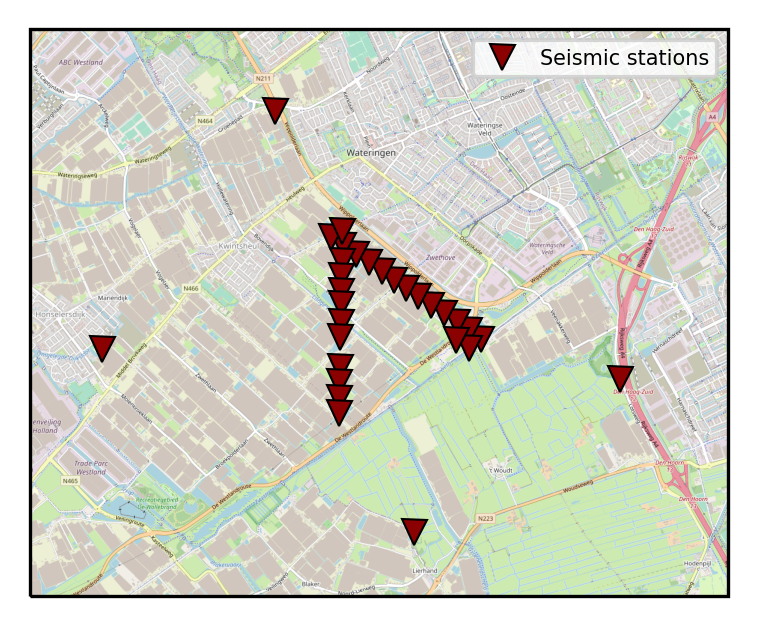

In [183]:
### Plot seismic stations on OSM
fig = plt.figure(figsize=(3,3),dpi=300)
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [st_data['mean_lat'], st_data['mean_lon']]  # lat/lon of center of array
zoom = 0.025 # for zooming out of center point
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax1.set_extent(extent) # set extents

scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # ad

ax1.plot(st_data['lons'], st_data['lats'], marker="v", color="darkred", markeredgewidth=0.5, markeredgecolor='k',linestyle='',label="Seismic stations", transform=ccrs.PlateCarree())
#i=0
#for station in st_data['stations']:
#    ax1.text(st_data['lons'][i], st_data['lats'][i], str(st_data['stations'][i]), transform=ccrs.PlateCarree())
#    i+=1
  
leg = plt.legend(fontsize=5,loc='best')

## 4. Computation of the Green's functions


A sandstone layer at a depth of about 2500m hosts the Kwintsheul geothermal reservoir. The hot water is expoited by a local consortium of greenhouse owners ([Nature's heat](https://www.naturesheat.nl/)). Preliminary analysis of the 2019 passive recordings resulted in the detection of one seismic event (Muntendam-Bos et al., 2022). This event serves as example for the simulated event; the latter we will use to assess and compare the various Markov chain samplers. In this section compute the Green's functions in the two velocity models considered.

In [184]:
### Define stations of interst (if applicable) and specify centroid

### Recordings by following stations will be used and the new all-encompassing array 'data' is initialized
sel_stations=[1,12,24,27,28,29,30]

### Depth of the seismic stations (The Netherlands is flat ;) )
r_z = 0 

### Location of syntetic event (currently at center of array)
ev_data={}
ev_data['lat']=st_data['mean_lat']
ev_data['lon']=st_data['mean_lon']
ev_data['z']=2200

In [185]:
### Weed out selected stations, and convert lat-lon to RD coordinates.

### initalize function to convert lat-lon to RD coordinates.
crs_latlon = CRS("EPSG:4326")  
crs_amersfoort = CRS("EPSG:28992")
transformer = Transformer.from_crs(crs_latlon, crs_amersfoort)

### Initialize lists with locations of selected stations 
data={}
data['station']={}

### Weed out selected stations and convert lon lat to RD coordinates
for sta in sel_stations:
    
    index=st_data['stations'].index(sta)
    RD=transformer.transform(float(st_data['lats'][index]),float(st_data['lons'][index]))

    data['station'][sta]={}
    data['station'][sta]['lat']=st_data['lats'][index]
    data['station'][sta]['lon']=st_data['lons'][index]
    data['station'][sta]['RDx']=RD[0]
    data['station'][sta]['RDy']=RD[1]
    data['station'][sta]['uni']={}
    data['station'][sta]['lat_uni']={}

### transform event lon lat to RD coordinates
ev_data['e'],ev_data['n'] = transformer.transform(ev_data['lat'], ev_data['lon'])  
#print(ev_data['n'],ev_data['e'],ev_data['z'])


### I: Green's function for a uniform subsurface

A local geographic coordinate system is used to define a Cartesian system tensor, with positive $x_1$ being northward, positive $x_2$ eastward, and positive $x_3$ being downward (NED).***ToDo: Provide the Green's functions in a uniform medium (based on Aki & Richards).***

In [244]:
### Parameters describing the uniform medium and time sampling
# medium parameters
rho = 2500                # Density kg/m^3 
beta = 1200               # S-wave velocity
alpha = sqrt(3)*beta      # p-wave velocity
# Samples per second (this should coincide with the sampling rate prescribed to qseis)
sps = 50
dt =1./sps

In [245]:
### The following five functions return the radiation patterns 
### of near (UN), intermediate (UIP, UIS), and far (UFP,UFS) field terms of the Green's function
### Scalar factors in solution of Aki & Richards (Eq. 4.29)

def compGN(gamma):
    GN= np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GN[i,j,k] = 15*gamma[i]*gamma[j]*gamma[k]
                if i==j:
                    GN[i,j,k]=GN[i,j,k] - 3*gamma[k]
                if i==k:
                    GN[i,j,k]=GN[i,j,k] - 3*gamma[j]
                if j==k:
                    GN[i,j,k]=GN[i,j,k] - 3*gamma[i]
    return asarray(GN)


#################################################################################################
# def compGIP(gamma):
#     GIP = np.zeros((3, 3, 3))
#     for i in range(3):
#         for j in range(3):
#             for k in range(3):
#                 GIP[i,j,k] = 6*gamma[i]*gamma[j]*gamma[k]
#                 if i==j:
#                     GIP[i,j,k]=GIP[i,j,k] - gamma[k]
#                 if i==k:
#                     GIP[i,j,k]=GIP[i,j,k] - gamma[j]
#                 if j==k:
#                     GIP[i,j,k]=GIP[i,j,k] - gamma[i]
#     return asarray(GIP)
# The function above computes the expression given in Aki & Richards (eq. 4.29, second line). 
# After some scrutiny of the equation, I am fairly convinced it is not correct.
# I believe this is the correct one:

def compGIP(gamma):
    GIP = np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GIP[i,j,k] = 3*gamma[i]*gamma[j]*gamma[k]
                if i==k:
                    GIP[i,j,k]=GIP[i,j,k] - gamma[j]
                if j==k:
                    GIP[i,j,k]=GIP[i,j,k] - gamma[i]
    return asarray(GIP)


#################################################################################################
# def compGIS(gamma):
#     GIS = np.zeros((3, 3, 3))
#     for i in range(3):
#         for j in range(3):
#             for k in range(3):
#                 GIS[i,j,k] = 6*gamma[i]*gamma[j]*gamma[k]
#                 if i==j:
#                     GIS[i,j,k]=GIS[i,j,k] - 2*gamma[k]
#                 if i==k:
#                     GIS[i,j,k]=GIS[i,j,k] - gamma[j]
#                 if j==k:
#                     GIS[i,j,k]=GIS[i,j,k] - gamma[i]
#     return asarray(GIS)
# The function above computes the expression given in Aki & Richards (eq. 4.29, third line). 
# After some scrutiny of the equation, I am fairly convinced it is not correct.
# I believe this is the correct one:

def compGIS(gamma):
    GIS = np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GIS[i,j,k] = 3*gamma[i]*gamma[j]*gamma[k]
                if i==j:
                    GIS[i,j,k]=GIS[i,j,k] - gamma[k]
                if i==k:
                    GIS[i,j,k]=GIS[i,j,k] - gamma[j]
                if j==k:
                    GIS[i,j,k]=GIS[i,j,k] - gamma[i]
    return asarray(GIS)


#################################################################################################
def compGFP(gamma):
    GFP = np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GFP[i,j,k] = gamma[i]*gamma[j]*gamma[k]
    return asarray(GFP)


#################################################################################################
def compGFS(gamma):
    GFS = np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GFS[i,j,k] = gamma[i]*gamma[j]*gamma[k]
                if i==j:
                    GFS[i,j,k]=GFS[i,j,k] - gamma[k]
    return asarray(GFS)



In [246]:
### Calculate Green's functions
def calculate_GF(r_n, r_e, r_z, s_n, s_e, s_z):
    '''
    Function to calculate the synthetic Green's function of an event located at 
    s_z, s_n, s_e recorded at a receiver located at r_z, r_n, r_e.
    Coordinates should be cartesian.
    
    returns
    --------
    GF:
        four-dimensional array (5x3x3x3) for near field, intermediate field P & S, and far-field P & S waves
    r: 
        Distance from hypocenter.
    '''
       
    r_n = r_n - s_n
    r_e = r_e - s_e
    r_z = r_z - s_z
    #print(r_n,r_e,r_z)
    
    ### Distance
    r = sqrt(r_n**2 + r_e**2 + r_z**2)

    ### Directional cosines
    gamma = [r_n/r, r_e/r, r_z/r]

    ### Scalar factors in solution of Aki & Richards (Eq. 4.29; also eq. 4.32)
    prefactor = 1/(4 * pi * rho)
    CN  = prefactor/(r**4) 
    CIP = prefactor/(alpha**2 * r**2)
    CIS = prefactor/(beta**2 * r**2)
    CFP = prefactor/(alpha**3 * r)
    CFS = prefactor/(beta**3 * r)

    ### Compute radiation patterns
    GN = compGN(gamma)
    GIP = compGIP(gamma)
    GIS = compGIS(gamma)
    GFP = compGFP(gamma)
    GFS = compGFS(gamma)
    
    # Actual Green's functions
    GF = np.zeros((5, 3, 3, 3))
    GF[0,:,:,:]=CN*GN
    GF[1,:,:,:]=CIP*GIP
    GF[2,:,:,:]=CIS*GIS
    GF[3,:,:,:]=CFP*GFP
    GF[4,:,:,:]=CFS*GFS

    return GF, r

In [247]:
### Compute Green's functions
### Loop over seismic stations to compute derivatives of Green's tensors 
for sta in data['station']:
    data['station'][sta]['uni']['GF'] = np.zeros((5,3,3,3))
    data['station'][sta]['uni']['GF'], data['station'][sta]['r'] = calculate_GF(data['station'][sta]['RDy'], data['station'][sta]['RDx'], r_z, ev_data['n'], ev_data['e'], ev_data['z'])
    

### II: Green's function for a vertically heterogeneous subsurface

***ToDo: Provide the Green's functions in a laterally homogeneous medium (based on Heimann et al., 2019).***

We have used [Pyrocko's fomosto](https://pyrocko.org/docs/current/apps/fomosto/index.html) to generate a Green's function store. Specifically, we have used the backed *qseis* for this purpose. Generation of the Green's function stores involves a two-step procedure. First, travel times of the prescribed phases are computed using `fomosto ttt --force`. Subsequently, the actual Green's function store is generated using `fomosto build --force`. The parameters determining spatial and temporal resolution, spatial extend, depth of interest, etc. are defined in the *config* file. Addition qseis related parameters are set in *./extra/qseis*.

<!--The analytical Green's displacement vector due to a (moment tensor) point source in such a medium is explicitly derived in Aki & Richards (2002) and given in equation 4.29. The investigation of the different sampling strategies focussses on so-called Piecewise deterministic Processes (PDPs). -->

##  5. Define moment tensor of event

***ToDO: Below we...(including Pyrocko's ability to compute MT from strike dip and rake, and include text below)***

### Strike, dip, and rake

Often, a local geographic coordinate system is used to define a Cartesian system tensor, with positive $x_1$ being northward, positive $x_2$ eastward, and positive $x_3$ being downward (NED). The NED coordinate system is used below to derive relations between the angles of a ruptured fault (strike and dip angle) and the dislocation direction on the rupture plane (rake angle). The strike, dip, and rake are denoted by $\varphi$, $\delta$, and $\lambda$, respectively, and are defined as follows:
* Strike ($\varphi$) is defined as the clockwise angle of the fault from North (positive $x_1$)
* Dip ($\delta$) is defined as the angle with the horizontal plane, in a direction 90 degrees clockward of strike.
* Rake ($\lambda$) gives the direction of relative displacement along fault and is defined as the angle, counterclockwise, with respect to the strike. 0 < rake < 180 therefore means that the there is a component of thrust faulting, whereas -180 < rake < 0 implies a component of normal faulting

<center>
    <figure>
        <img src="./FIGURES/strike_dip_rake.png" width="60%"/>
        <figcaption class="figure-caption text-left"><i>Example of an oblique thrust fault with a strike of 90 degrees. </i></figcaption>
    </figure>
</center>



In [248]:
### Define the parameters describing the induced seismic event

### Moment Magnitude of the earthquake(Mw)
ev_data['mag'] = 2.5  

### Orientation of the fault and direction of slip
ev_data['strike'] = 0       # Strike is defined as the clockwise angle of the fault from North (positive x1)
ev_data['dip'] = 45     # Dip is defined as the angle with the horizontal plane, 
                 # in a direction 90 degrees clockward of strike.
ev_data['rake'] = -90      # Rake gives the direction of relative displacement along fault and defined as the 
                 # angle, counterclockwise, with respect to the strike. 0 < rake < 180 therefore means
                 # that the there is a component of thrust faulting, whereas -180 < rake < 0 implies
                 # a component of normal faulting

### Source time function
#stf = 'gauss'             # Set the desired source time function 'heaviside' , 'gauss error function'
ev_data['Trise'] = 0.02              # Rise time used in the source time function 

In [249]:
from pyrocko.gf import STF
from pyrocko.guts import Float
import numpy as num


class LinearRampSTF(STF):
    '''Linearly decreasing ramp from maximum amplitude to zero.'''

    duration = Float.T(
        default=0.0,
        help='baseline of the ramp')

    anchor = Float.T(
        default=0.0,
        help='anchor point with respect to source-time: ('
             '-1.0: left -> source duration [0, T] ~ hypocenter time, '
             ' 0.0: center -> source duration [-T/2, T/2] ~ centroid time, '
             '+1.0: right -> source duration [-T, 0] ~ rupture end time)')

    def discretize_t(self, deltat, tref):
        # method returns discrete times and the respective amplitudes
        tmin_stf = tref - self.duration * (self.anchor + 1.) * 0.5
        tmax_stf = tref + self.duration * (1. - self.anchor) * 0.5
        tmin = round(tmin_stf / deltat) * deltat
        tmax = round(tmax_stf / deltat) * deltat
        nt = int(round((tmax - tmin) / deltat)) + 1
        times = num.linspace(tmin, tmax, nt)
        if nt > 1:
            amplitudes = num.linspace(1., 0., nt)
            amplitudes /= num.sum(amplitudes)  # normalise to keep moment
        else:
            amplitudes = num.ones(1)

        return times, amplitudes

    def base_key(self):
        # method returns STF name and the values
        return (self.__class__.__name__, self.duration, self.anchor)

In [250]:
from pyrocko.gf import BoxcarSTF, TriangularSTF
#stf = BoxcarSTF(5., center=0.)
stf = LinearRampSTF(5., anchor=0.)
print(stf.times)


AttributeError: 'LinearRampSTF' object has no attribute 'times'

In [252]:
### Derived parameters of the seismic event, including the moment tensor 

# Convert moment magnitude to moment based on Kanamori (1977); See Aki & Richards, eq. 3.17
ev_data['M0']=10**(1.5*ev_data['mag']+9.1)  
# Compute moment tensor components from strike, dip, rake and scalar moment
ev_data['mt'] = pmt.MomentTensor(strike=ev_data['strike'], dip=ev_data['dip'], rake=ev_data['rake'], scalar_moment=ev_data['M0'])

# Reformulate moment tensor as 3 x 3 matrix
ev_data['mt_matrix']=np.zeros((3, 3))
ev_data['mt_matrix'][0,0]=ev_data['mt'].mnn
ev_data['mt_matrix'][1,1]=ev_data['mt'].mee
ev_data['mt_matrix'][2,2]=ev_data['mt'].mdd
ev_data['mt_matrix'][0,1]=ev_data['mt'].mne
ev_data['mt_matrix'][1,0]=ev_data['mt'].mne
ev_data['mt_matrix'][0,2]=ev_data['mt'].mnd
ev_data['mt_matrix'][2,0]=ev_data['mt'].mnd
ev_data['mt_matrix'][1,2]=ev_data['mt'].med
ev_data['mt_matrix'][2,1]=ev_data['mt'].med

# Source time function times  
stf = lambda t: (1 + erf(t/ev_data['Trise']))/2

# Calculate integrand of near-field term
integrand = lambda  tau, t: tau*stf(t - tau)

# Evaluate integral of near-field term
def integral(t, r):
    return quad(integrand, r/alpha, r/beta, args=(t))[0]   # Mind that alpha and beta need to be defined at the time this function is called

vec_integral = vectorize(integral)

### Create source time function here for non lat...
data['station'][sta]['uni']['tmin'] = tmin


# Number of samples depends on source-receiver distance and rise time
for sta in data['station']:
    tmin = data['station'][sta]['r']/alpha - 2*ev_data['Trise']
    tmax = data['station'][sta]['r']/beta + ev_data['Trise'] + 2*ev_data['Trise']
    
    tmin = tmin - (tmin % dt)
    tmax = tmax - (tmax % dt) + dt
    
    nsmpls = round((tmax-tmin)/dt)+1
    
    data['station'][sta]['uni']['tmin'] = tmin
    data['station'][sta]['uni']['tmax'] = tmax
    data['station'][sta]['uni']['nsmpls'] = nsmpls
    data['station'][sta]['uni']['t'] = linspace(tmin, tmax, nsmpls)
    
#     print(sta,tmin,tmax,nsmpls)
#     print(data['station'][sta]['uni']['t'])
#     print()
  

[-0.2   -0.198 -0.196 -0.194 -0.192 -0.19  -0.188 -0.186 -0.184 -0.182
 -0.18  -0.178 -0.176 -0.174 -0.172 -0.17  -0.168 -0.166 -0.164 -0.162
 -0.16  -0.158 -0.156 -0.154 -0.152 -0.15  -0.148 -0.146 -0.144 -0.142
 -0.14  -0.138 -0.136 -0.134 -0.132 -0.13  -0.128 -0.126 -0.124 -0.122
 -0.12  -0.118 -0.116 -0.114 -0.112 -0.11  -0.108 -0.106 -0.104 -0.102
 -0.1   -0.098 -0.096 -0.094 -0.092 -0.09  -0.088 -0.086 -0.084 -0.082
 -0.08  -0.078 -0.076 -0.074 -0.072 -0.07  -0.068 -0.066 -0.064 -0.062
 -0.06  -0.058 -0.056 -0.054 -0.052 -0.05  -0.048 -0.046 -0.044 -0.042
 -0.04  -0.038 -0.036 -0.034 -0.032 -0.03  -0.028 -0.026 -0.024 -0.022
 -0.02  -0.018 -0.016 -0.014 -0.012 -0.01  -0.008 -0.006 -0.004 -0.002
  0.     0.002  0.004  0.006  0.008  0.01   0.012  0.014  0.016  0.018
  0.02   0.022  0.024  0.026  0.028  0.03   0.032  0.034  0.036  0.038
  0.04   0.042  0.044  0.046  0.048  0.05   0.052  0.054  0.056  0.058
  0.06   0.062  0.064  0.066  0.068  0.07   0.072  0.074  0.076  0.078
  0.08

<function matplotlib.pyplot.show(close=None, block=None)>

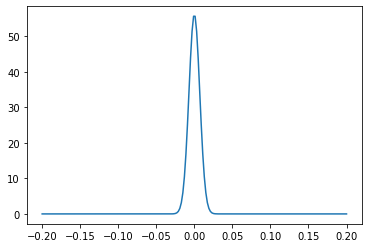

In [221]:
t1 = linspace(-0.2, 0.2, 200)
t2, dt = linspace(-0.2, 0.2, 201, retstep=True)
print(t2,diff(stf(t2)))
vstf = diff(stf(t2))
#plt.plot(t1,stf(t1))
plt.plot(t1,diff(stf(t2))/dt)
plt.show

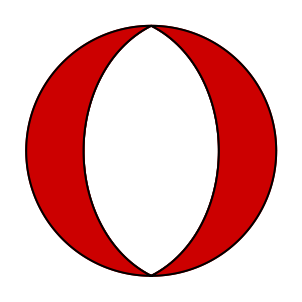

Moment tensor:


$M_{1,j}$  $M_{2,j}$  $M_{3,j}$
$M_{i,1}$          0   0.000307  -0.000307
$M_{i,2}$   0.000307   7.08e+12   -0.00127
$M_{i,3}$  -0.000307   -0.00127  -7.08e+12

In [194]:
### Plot beachball

fig = plt.figure(figsize=(4., 4.))
fig.subplots_adjust(left=0., right=1., bottom=0., top=1.)
axes = fig.add_subplot(1,1,1)
axes.set_xlim(0., 2.)
axes.set_ylim(0., 2.)
axes.set_axis_off()

beachball.plot_beachball_mpl(
            pmt.as_mt(ev_data['mt']),
            axes,
            beachball_type='full',
            size=250.,
            position=(1, 1),
            color_t=plot.mpl_color('scarletred2'),
            linewidth=2.0)
plt.show()


print("Moment tensor:")
Moment_Tensor = pd.DataFrame(ev_data['mt_matrix'], 
                             columns=['$M_{1,j}$','$M_{2,j}$','$M_{3,j}$'],
                             index=['$M_{i,1}$','$M_{i,2}$','$M_{i,3}$'],
                            )

display(Moment_Tensor)

##  6. Compute synthetic waveforms

***ToDO: Below we...(Some description of the problem at hand)***



### Synthetic waveforms for a uniform subsurface

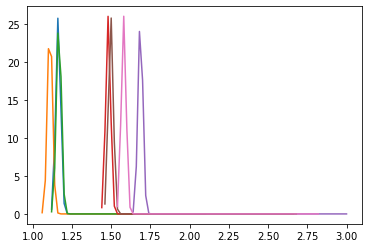

In [264]:
### Iterate over the stations and convolve spatial derivatives of Green's functions with the Moment tensor
for sta in data['station']:

    GF = data['station'][sta]['uni']['GF']
    nsmpls = data['station'][sta]['uni']['nsmpls']


    UN = np.zeros((3))
    UIP = np.zeros((3))
    UIS = np.zeros((3))
    UFP = np.zeros((3))
    UFS = np.zeros((3))

    UNt = np.zeros((3,nsmpls))
    UIPt = np.zeros((3,nsmpls))
    UISt = np.zeros((3,nsmpls))
    UFPt = np.zeros((3,nsmpls))
    UFSt = np.zeros((3,nsmpls))
  
                
    ### near field wave
    for i in range(3):
            for j in range(3):
                UN[0]=UN[0]+GF[0,0,i,j]*ev_data['mt_matrix'][i,j]
                UN[1]=UN[1]+GF[0,1,i,j]*ev_data['mt_matrix'][i,j]
                UN[2]=UN[2]+GF[0,2,i,j]*ev_data['mt_matrix'][i,j]
    
    ### Intermediate field P wave
    for i in range(3):
            for j in range(3):
                UIP[0]=UIP[0]+GF[1,0,i,j]*ev_data['mt_matrix'][i,j]
                UIP[1]=UIP[1]+GF[1,1,i,j]*ev_data['mt_matrix'][i,j]
                UIP[2]=UIP[2]+GF[1,2,i,j]*ev_data['mt_matrix'][i,j]

    ### Intermediate field S wave
    for i in range(3):
            for j in range(3):
                UIS[0]=UIS[0]+GF[2,0,i,j]*ev_data['mt_matrix'][i,j]
                UIS[1]=UIS[1]+GF[2,1,i,j]*ev_data['mt_matrix'][i,j]
                UIS[2]=UIS[2]+GF[2,2,i,j]*ev_data['mt_matrix'][i,j]

    ### far field P wave
    for i in range(3):
            for j in range(3):
                UFP[0]=UFP[0]+GF[3,0,i,j]*ev_data['mt_matrix'][i,j]
                UFP[1]=UFP[1]+GF[3,1,i,j]*ev_data['mt_matrix'][i,j]
                UFP[2]=UFP[2]+GF[3,2,i,j]*ev_data['mt_matrix'][i,j]

    ### far field S wave
    for i in range(3):
            for j in range(3):
                UFS[0]=UFS[0]+GF[4,0,i,j]*ev_data['mt_matrix'][i,j]
                UFS[1]=UFS[1]+GF[4,1,i,j]*ev_data['mt_matrix'][i,j]
                UFS[2]=UFS[2]+GF[4,2,i,j]*ev_data['mt_matrix'][i,j]
                
      
    tmin = data['station'][sta]['uni']['tmin']
    tmax = data['station'][sta]['uni']['tmax']
    t = data['station'][sta]['uni']['t']
    UNt[:,:] = outer(UN[:],vec_integral(t,data['station'][sta]['r']))
    UIPt[:,:] = outer(UIP[:],stf(t-data['station'][sta]['r']/alpha))
    UISt[:,:] = outer(UIS[:],stf(t-data['station'][sta]['r']/beta))

    t2, dt2 = linspace(tmin, tmax, nsmpls+1, retstep=True)
    UFPt[:,:] = outer(UFP[:], diff(stf(t2 - data['station'][sta]['r']/alpha))/dt2)
    UFSt[:,:] = outer(UFS[:], diff(stf(t2 - data['station'][sta]['r']/beta))/dt2)

    #plt.plot(t,diff(stf(t2 - data['station'][sta]['r']/alpha))/dt2)
    #plt.show
    
    data['station'][sta]['uni']['u'] = UNt + UIPt - UISt + UFPt - UFSt

### Free memory
del UN,UIP,UIS,UFP,UFS,UNt,UIPt,UISt,UFPt,UFSt,t
status = gc.collect()

### Synthetic waveforms for a vertically heterogeneous subsurface

In [262]:
import os

from pyrocko.gf import LocalEngine, Target, DCSource, ws
from pyrocko import trace
from pyrocko.gui.marker import PhaseMarker



# The store we are going extract data from:
#store_id = 'kwintsheul'
store_id = 'uniform'


# First, download a Greens Functions store. If you already have one that you
# would like to use, you can skip this step and point the *store_superdirs* in
# the next step to that directory.

#if not os.path.exists(store_id):
#    print('test')
#    ws.download_gf_store(site='kinherd', store_id=store_id)

# We need a pyrocko.gf.Engine object which provides us with the traces
# extracted from the store. In this case we are going to use a local
# engine since we are going to query a local store.
#engine = LocalEngine(store_superdirs=['/Users/kweemstra/WORK/PROJECTS/2020_ZIGZAG/KWINTSHEUL_GF_DATABASE/'])
engine = LocalEngine(store_superdirs=['/Users/kweemstra/WORK/PROJECTS/2020_ZIGZAG/UNIFORM_GF_DATABASE/'])

# Define a list of pyrocko.gf.Target objects, representing the recording
# devices. In this case one station with a three component sensor will
# serve fine for demonstation.
channel_codes = 'NEZ'

targets = [
    Target(
        lat=data['station'][sta]['lat'],
        lon=data['station'][sta]['lon'],
        store_id=store_id,
        codes=('', sta, '', channel_code))
    for sta in data['station'] for channel_code in channel_codes ]
#print(targets)

# Let's use a double couple source representation.
source_dc = DCSource(
    lat=ev_data['lat'],
    lon=ev_data['lon'],
    depth=ev_data['z'],
    strike=ev_data['strike'],
    dip=ev_data['dip'],
    rake=ev_data['rake'],
    magnitude=ev_data['mag'],
    stf=HalfSinusoidSTF(duration=1.5))

# Processing that data will return a pyrocko.gf.Reponse object.
response = engine.process(source_dc, targets)

# This will return a list of the requested traces:
synthetic_traces = response.pyrocko_traces()

#i=0
#for station in st_data['stations']:
#    ax1.text(st_data['lons'][i], st_data['lats'][i], str(st_data['stations'][i]), transform=ccrs.PlateCarree())
#    i+=1
i=0
for sta in data['station']:
    #data['station'][sta]['uni']['u'] = np.zeros((3,2000))
    ### fill time vector and initialize data vector; nsamples is the same for each component
    tmin = synthetic_traces[3*i].tmin
    tmax = round(synthetic_traces[3*i].tmax,4)+0.000000001
    deltat = synthetic_traces[3*i].deltat
    nsamples = len(synthetic_traces[3*i].ydata)
    data['station'][sta]['lat_uni']['deltat']=deltat
    data['station'][sta]['lat_uni']['t'] = np.arange(tmin,tmax,deltat)
    #print(len(data['station'][sta]['lat_uni']['t']),nsamples)
    data['station'][sta]['lat_uni']['u'] = np.zeros((3,nsamples))
    
    for j in range(len(channel_codes)):
#         print(sta)
#         print(synthetic_traces[3*i+j].station)
#         print(synthetic_traces[3*i+j].channel)
#         print(synthetic_traces[3*i+j].tmin)
#         print(synthetic_traces[3*i+j].tmax)
#         print(synthetic_traces[3*i+j].deltat)
#         print(len(synthetic_traces[3*i+j].ydata))
#         print(synthetic_traces[2].mtime)
#         print(synthetic_traces[2].meta)
        data['station'][sta]['lat_uni']['u'][j,:] = synthetic_traces[3*i+j].ydata
        
    i+=1



NameError: name 'HalfSinusoidSTF' is not defined

### Plot waveforms

In [263]:
### Some functions for plotting
def compute_ticks(nticks,precision,extent):
    """
    Function returning location of ticks along both axis; nticks gives approximate number of ticks;
    The required precision (which depends on the map size) is a power of ten, e.g., 0.01, 0.1, 1, 10, 
    helps to dictate spacing between ticks.
    
    returns
    --------
    xticks:
        Vector containing the positions of the ticks placed along the horizontal axis
    ytics: 
        Vector containing the positions of the ticks placed along the vertical axis
    """
    rounding=int(-1*np.log10(precision))

    nxticks=int((round(extent[1]+precision,rounding)-round(extent[0],rounding))/precision)
    tick_incr = np.ceil(nxticks/float(nticks)) if nxticks > nticks else nxticks
    xticks=np.zeros(nticks)
    for i in range(nticks):
        xticks[i]=round(extent[0],rounding)+i*precision*tick_incr

    nyticks=int((round(extent[3]+precision,rounding)-round(extent[2],rounding))/precision)
    tick_incr = np.ceil(nyticks/float(nticks)) if nyticks > nticks else nyticks
    yticks=np.zeros(nticks)
    for i in range(nticks):
        yticks[i]=round(extent[2],rounding)+i*precision*tick_incr
    
    ### Ensure all ticks are within the bounds of the plot
    xticks = np.delete(xticks, np.where(xticks < extent[0]))
    xticks = np.delete(xticks, np.where(xticks > extent[1]))
    yticks = np.delete(yticks, np.where(yticks < extent[2]))
    yticks = np.delete(yticks, np.where(yticks > extent[3]))  
      
    return xticks,yticks


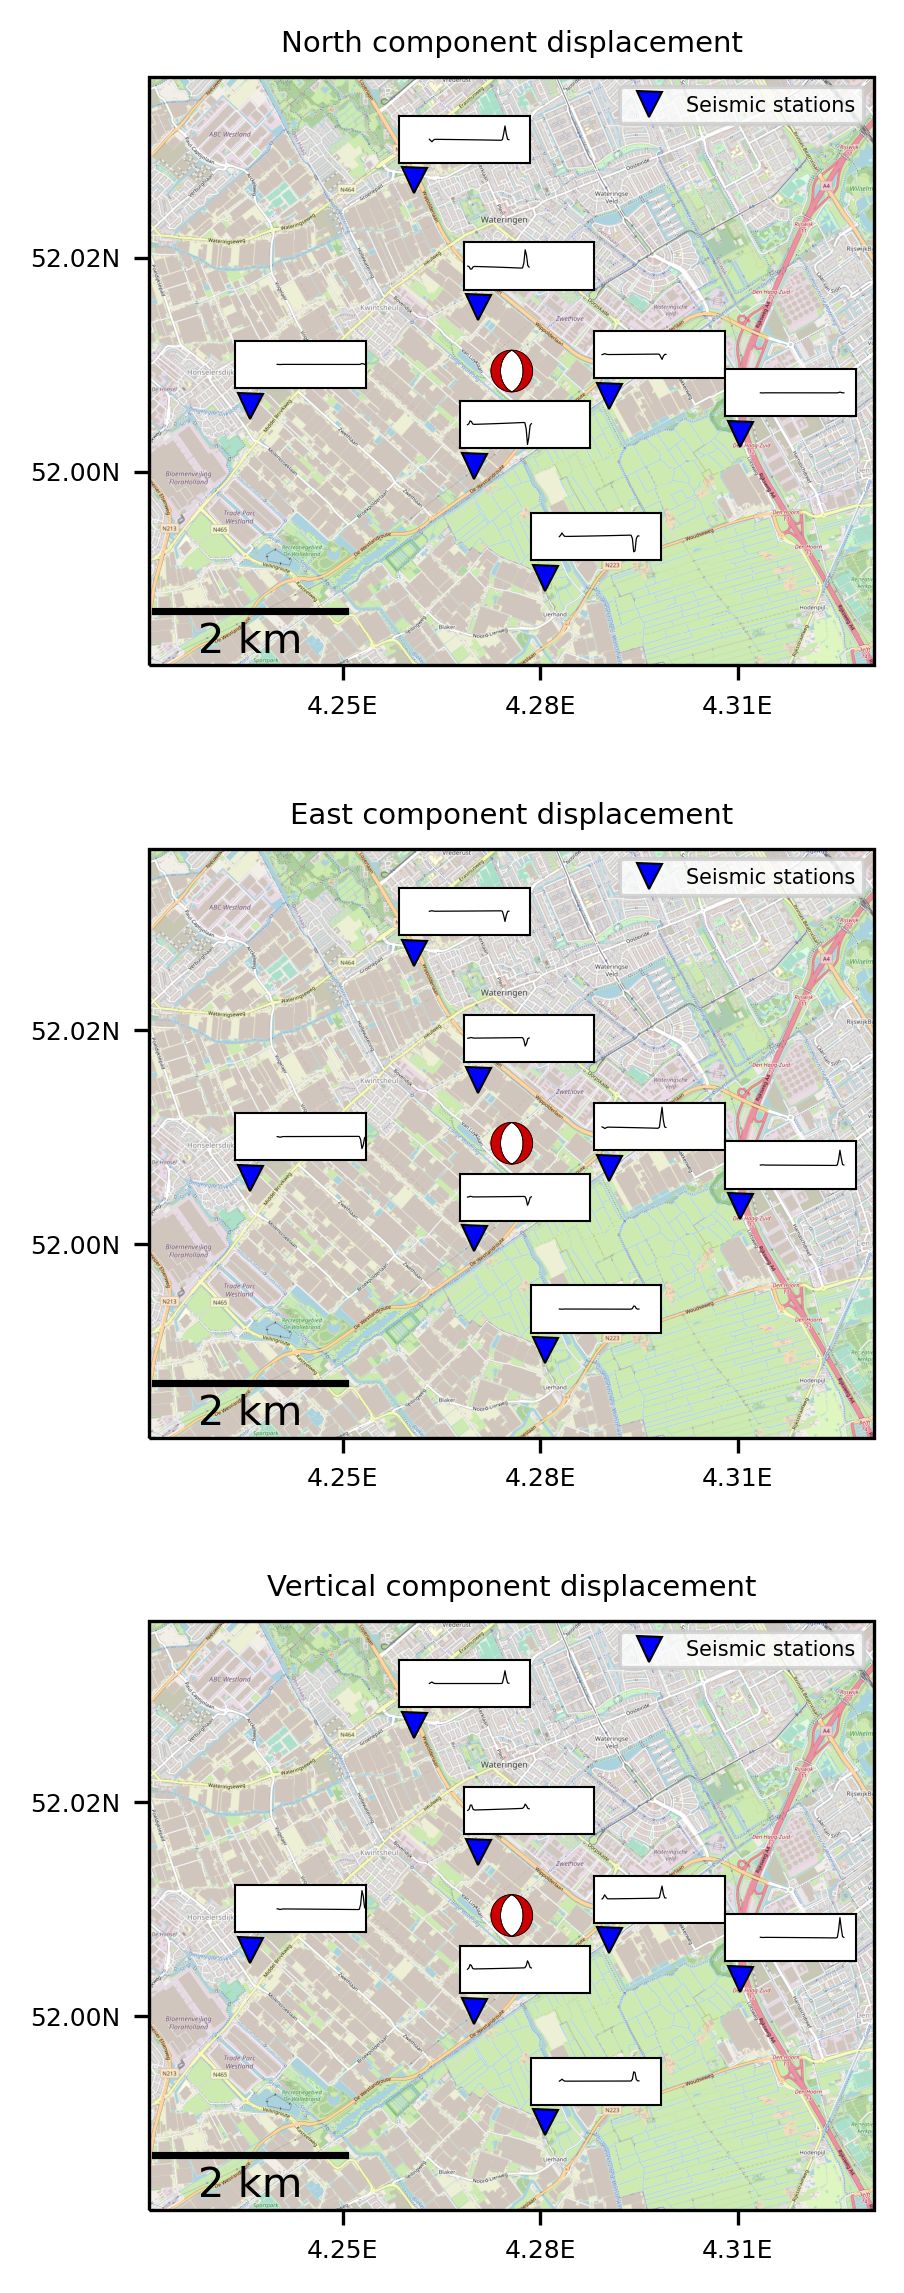

In [256]:
### Plot both beachball and waveforms on map
### Projection using coordinate reference system (CRS) of street map; three plots for NED components
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,8),dpi=300, subplot_kw={'projection': osm_img.crs})

center_pt = [ev_data['lat'], ev_data['lon']]  # lat/lon of center of array
zoom = 0.0275 # for zooming out of center point
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom

### The scale here is needed by ax[...].add_image(osm_img, int(scale)) 
### empirical solution for scale based on zoom is computed
scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) 
scale = (scale<20) and scale or 19 # scale cannot be larger than 19

### Some math to get proper ticks; nticks gives approximate number of ticks;
### precision should be a power of ten and depends on size of map (e.g., 0.01, 0.1, 1, etc.)
nticks=5; precision=0.01 
xticks,yticks = compute_ticks(nticks,precision,extent)

### Set format of longitude and latitude annotations
lon_formatter = LongitudeFormatter(number_format='0.2f',degree_symbol='',dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.2f',degree_symbol='') # format lats

## compute width and height in degrees for locations of inset plots
lon_width=extent[1]-extent[0]
lat_heigth=extent[3]-extent[2]

### Plot the beachball as inset; determine position
boxw=0.1; boxh=0.1
hor_pos=((ev_data['lon']-extent[0])/lon_width)-boxw/2. ### Beachball will be plot in center of grid
ver_pos=((ev_data['lat']-extent[2])/lat_heigth)-boxh/2. ### Beachball will be plot in center of grid
bb_trace_box=[hor_pos,ver_pos,boxw,boxh]

for i in range(3):
    ax[i].set_extent(extent) # set extent
    
    if(i == 0):
        ax[i].set_title('North component displacement', fontsize=7)
    elif(i == 1):
        ax[i].set_title('East component displacement', fontsize=7)
    elif(i == 2):
        ax[i].set_title('Vertical component displacement', fontsize=7)


    ax[i].add_image(osm_img, int(scale)) 

    ax[i].set_xticks(xticks,crs=ccrs.PlateCarree()) # set longitude indicators
    ax[i].set_yticks(yticks,crs=ccrs.PlateCarree()) # set latitude indicators

    ax[i].xaxis.set_major_formatter(lon_formatter) # set lons
    ax[i].yaxis.set_major_formatter(lat_formatter) # set lats
    ax[i].xaxis.set_tick_params(labelsize=6)
    ax[i].yaxis.set_tick_params(labelsize=6)

    for sta in data['station']:
        ax[i].plot(data['station'][sta]['lon'], data['station'][sta]['lat'], marker="v", color="blue", markeredgewidth=0.5, markeredgecolor='k',linestyle='', transform=ccrs.PlateCarree())
    
    ### This station is not plotted (lat and lon are zero), but this line is needed to plot legend (label="Seismic stations")
    ax[i].plot(0., 0., marker="v", color="blue", markeredgewidth=0.5, markeredgecolor='k',linestyle='',label="Seismic stations", transform=ccrs.PlateCarree())

    ### This is rather approximate... Good enough for Kwintsheul at the moment. Needed to fiddle a bit.
    scalebar = AnchoredSizeBar(ax[i].transData,
                           3267, '2 km', 'lower left', 
                           pad=0.0,
                           color='black',
                           frameon=False,
                           size_vertical=50)

    ax[i].add_artist(scalebar)
    ax[i].legend(fontsize=5,loc='best')

    ax_bb = ax[i].inset_axes(bb_trace_box, facecolor='None')
    ax_bb.set_xlim(-1,1)
    ax_bb.set_ylim(-1,1)
    beachball.plot_beachball_mpl(
            pmt.as_mt(ev_data['mt']),
            ax_bb,
            beachball_type='full',
            size=10.,
            position=(0, 0), ### hor_pos and ver_pos are the reference location for the tracebox
            color_t=plot.mpl_color('scarletred2'),
            linewidth=0.2)

    ax_bb.set_axis_off()

    ### Determine, for the current component (N,E, or Z) the maximum amplitude
    amp_max = 0.
    for sta in data['station']:
        #max_amp = np.amax(abs(data['station'][sta]['lat_uni']['u'][i,:]))
        max_amp = np.amax(abs(data['station'][sta]['uni']['u'][i,:]))
        if(max_amp > amp_max):
            amp_max = max_amp
            
       
    ### Plot the waveforms as insets
    boxw=0.18; boxh=0.08
    for sta in data['station']:
        hor_pos=(data['station'][sta]['lon']-extent[0])/lon_width
        ver_pos=(data['station'][sta]['lat']-extent[2])/lat_heigth
        trace_box=[hor_pos-0.02,ver_pos+0.03,boxw,boxh] ### Just above station
        ax_inset = ax[i].inset_axes(trace_box, facecolor='w')
        ax_inset.set_xlim(1.,3)
        ax_inset.set_ylim(-1.2,1.2)
        ax_inset.plot(data['station'][sta]['uni']['t'],data['station'][sta]['uni']['u'][i,:]/amp_max,'-',linewidth=0.3,color="black")
        #ax_inset.plot(data['station'][sta]['lat_uni']['t'],data['station'][sta]['lat_uni']['u'][i,:]/amp_max,'-',linewidth=0.3,color="black")
        ax_inset.xaxis.set_visible(False)
        ax_inset.yaxis.set_visible(False)
        for axis in ['top','bottom','left','right']:
            ax_inset.spines[axis].set_linewidth(0.5)
   
fig.tight_layout(pad=2.0)


-0.9 9.040000000000008
-0.92 8.720000000000008
-0.9 9.060000000000008
-0.78 10.16000000000001
-0.72 10.72000000000001
-0.78 10.20000000000001
-0.76 10.46000000000001
-0.9 9.040000000000008
-0.92 8.720000000000008
-0.9 9.060000000000008
-0.78 10.16000000000001
-0.72 10.72000000000001
-0.78 10.20000000000001
-0.76 10.46000000000001
-0.9 9.040000000000008
-0.92 8.720000000000008
-0.9 9.060000000000008
-0.78 10.16000000000001
-0.72 10.72000000000001
-0.78 10.20000000000001
-0.76 10.46000000000001


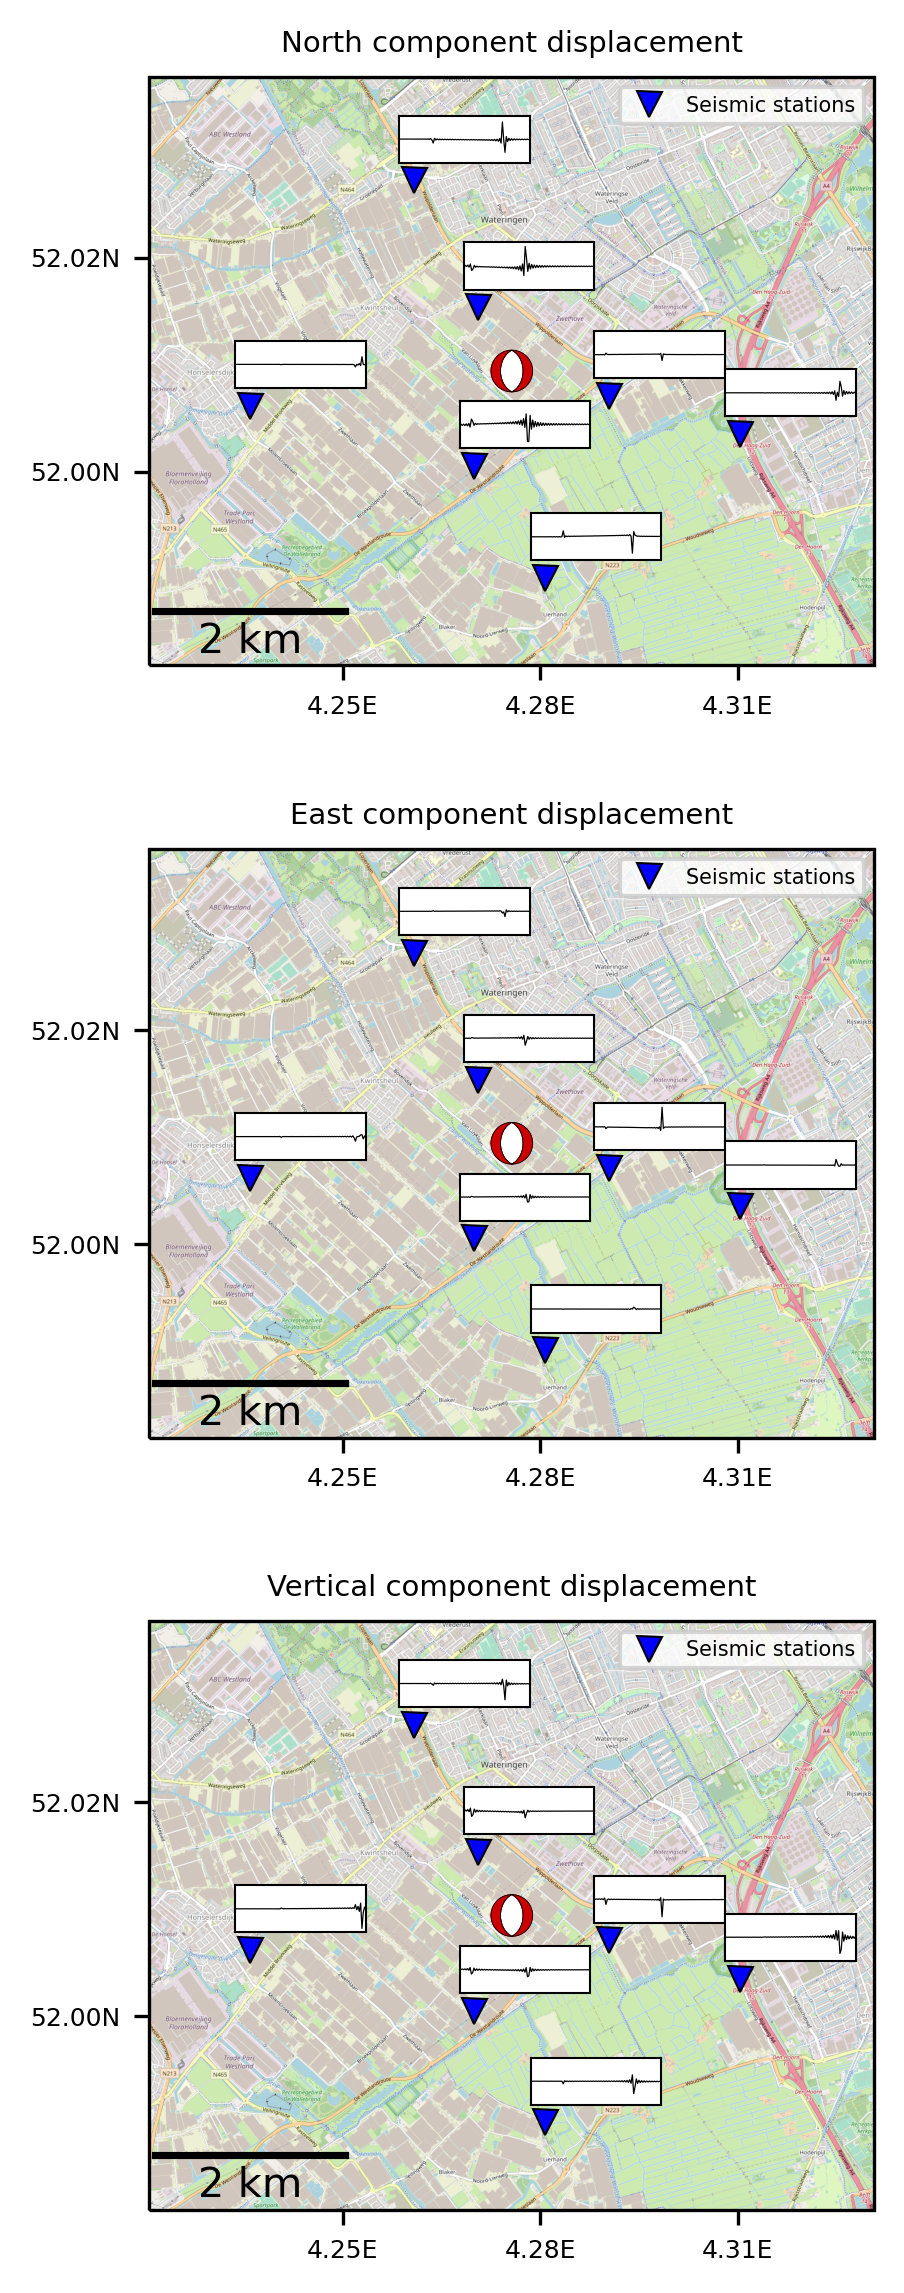

In [199]:
### Plot both beachball and waveforms on map
### Projection using coordinate reference system (CRS) of street map; three plots for NED components
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,8),dpi=300, subplot_kw={'projection': osm_img.crs})

center_pt = [ev_data['lat'], ev_data['lon']]  # lat/lon of center of array
zoom = 0.0275 # for zooming out of center point
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom

### The scale here is needed by ax[...].add_image(osm_img, int(scale)) 
### empirical solution for scale based on zoom is computed
scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) 
scale = (scale<20) and scale or 19 # scale cannot be larger than 19

### Some math to get proper ticks; nticks gives approximate number of ticks;
### precision should be a power of ten and depends on size of map (e.g., 0.01, 0.1, 1, etc.)
nticks=5; precision=0.01 
xticks,yticks = compute_ticks(nticks,precision,extent)

### Set format of longitude and latitude annotations
lon_formatter = LongitudeFormatter(number_format='0.2f',degree_symbol='',dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.2f',degree_symbol='') # format lats

## compute width and height in degrees for locations of inset plots
lon_width=extent[1]-extent[0]
lat_heigth=extent[3]-extent[2]

### Plot the beachball as inset; determine position
boxw=0.1; boxh=0.1
hor_pos=((ev_data['lon']-extent[0])/lon_width)-boxw/2. ### Beachball will be plot in center of grid
ver_pos=((ev_data['lat']-extent[2])/lat_heigth)-boxh/2. ### Beachball will be plot in center of grid
bb_trace_box=[hor_pos,ver_pos,boxw,boxh]

for i in range(3):
    ax[i].set_extent(extent) # set extent
    
    if(i == 0):
        ax[i].set_title('North component displacement', fontsize=7)
    elif(i == 1):
        ax[i].set_title('East component displacement', fontsize=7)
    elif(i == 2):
        ax[i].set_title('Vertical component displacement', fontsize=7)


    ax[i].add_image(osm_img, int(scale)) 

    ax[i].set_xticks(xticks,crs=ccrs.PlateCarree()) # set longitude indicators
    ax[i].set_yticks(yticks,crs=ccrs.PlateCarree()) # set latitude indicators

    ax[i].xaxis.set_major_formatter(lon_formatter) # set lons
    ax[i].yaxis.set_major_formatter(lat_formatter) # set lats
    ax[i].xaxis.set_tick_params(labelsize=6)
    ax[i].yaxis.set_tick_params(labelsize=6)

    for sta in data['station']:
        ax[i].plot(data['station'][sta]['lon'], data['station'][sta]['lat'], marker="v", color="blue", markeredgewidth=0.5, markeredgecolor='k',linestyle='', transform=ccrs.PlateCarree())
    
    ### This station is not plotted (lat and lon are zero), but this line is needed to plot legend (label="Seismic stations")
    ax[i].plot(0., 0., marker="v", color="blue", markeredgewidth=0.5, markeredgecolor='k',linestyle='',label="Seismic stations", transform=ccrs.PlateCarree())

    ### This is rather approximate... Good enough for Kwintsheul at the moment. Needed to fiddle a bit.
    scalebar = AnchoredSizeBar(ax[i].transData,
                           3267, '2 km', 'lower left', 
                           pad=0.0,
                           color='black',
                           frameon=False,
                           size_vertical=50)

    ax[i].add_artist(scalebar)
    ax[i].legend(fontsize=5,loc='best')

    ax_bb = ax[i].inset_axes(bb_trace_box, facecolor='None')
    ax_bb.set_xlim(-1,1)
    ax_bb.set_ylim(-1,1)
    beachball.plot_beachball_mpl(
            pmt.as_mt(ev_data['mt']),
            ax_bb,
            beachball_type='full',
            size=10.,
            position=(0, 0), ### hor_pos and ver_pos are the reference location for the tracebox
            color_t=plot.mpl_color('scarletred2'),
            linewidth=0.2)

    ax_bb.set_axis_off()

    ### Determine, for the current component (N,E, or Z) the maximum amplitude
    amp_max = 0.
    for sta in data['station']:
        #max_amp = np.amax(abs(data['station'][sta]['lat_uni']['u'][i,:]))
        max_amp = np.amax(abs(data['station'][sta]['lat_uni']['u'][i,:]))
        if(max_amp > amp_max):
            amp_max = max_amp
            
       
    ### Plot the waveforms as insets
    boxw=0.18; boxh=0.08
    for sta in data['station']:
        hor_pos=(data['station'][sta]['lon']-extent[0])/lon_width
        ver_pos=(data['station'][sta]['lat']-extent[2])/lat_heigth
        trace_box=[hor_pos-0.02,ver_pos+0.03,boxw,boxh] ### Just above station
        ax_inset = ax[i].inset_axes(trace_box, facecolor='w')
        print(data['station'][sta]['lat_uni']['t'][0],data['station'][sta]['lat_uni']['t'][len(data['station'][sta]['lat_uni']['t'])-1])
        ax_inset.set_xlim(1.,3)
        #ax_inset.set_xlim(data['station'][sta]['lat_uni']['t'][0],data['station'][sta]['lat_uni']['t'][len(data['station'][sta]['lat_uni']['t'])-1])
        ax_inset.set_ylim(-1.2,1.2)
        #sos = signal.butter(8, [6., 12.], 'bp', fs=round(1/data['station'][sta]['lat_uni']['deltat']), output='sos')
        #filtered_u = signal.sosfilt(sos, data['station'][sta]['lat_uni']['u'][i,:])
        #print(filtered_u)
        #ax_inset.plot(data['station'][sta]['lat_uni']['t'],filtered_u/np.amax(abs(filtered_u)),'-',linewidth=0.3,color="black")
        ax_inset.plot(data['station'][sta]['lat_uni']['t'],data['station'][sta]['lat_uni']['u'][i,:]/amp_max,'-',linewidth=0.3,color="black")
        ax_inset.xaxis.set_visible(False)
        ax_inset.yaxis.set_visible(False)
        for axis in ['top','bottom','left','right']:
            ax_inset.spines[axis].set_linewidth(0.5)
   
fig.tight_layout(pad=2.0)


In [200]:
### Compare Waveforms

1000


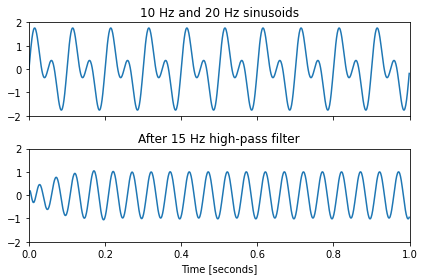

In [151]:
from scipy import signal
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])
print(len(t))

sos = signal.butter(10, 15, 'hp', fs=len(t), output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

##  6. Probabilistic inversions

***ToDO: Below we...***


<br><span style="font-size:1.5em;">*Import necessary modules and define functions required (run once at start)*</span>

<br><span style="font-size:1.5em;">Prescribe earthquake characteristics and compute moment tensor</span>

In [ ]:
### Define source characteristics
ev_data={}

# Event at center of array
ev_data['lat']=np.mean(st_data['lats'])
ev_data['lon']=np.mean(st_data['lons'])
ev_data['z']=2000

# transform event lon lat to RD coordinates
ev_data['e'],ev_data['n'] = transformer.transform(ev_data['lat'], ev_data['lon'])

# Station locations in RD coordinates
st_data['e'],st_data['n'] = transformer.transform(st_data['lats'], st_data['lons'])

# Moment Magnitude of the earthquake(Mw)
ev_data['mag'] = 2.5  

# Orientation of the fault and direction of slip
ev_data['strike'] = 0       # Strike is defined as the clockwise angle of the fault from North (positive x1)
ev_data['dip'] = 80     # Dip is defined as the angle with the horizontal plane, 
                 # in a direction 90 degrees clockward of strike.
ev_data['rake'] = -90      # Rake gives the direction of relative displacement along fault and defined as the 
                 # angle, counterclockwise, with respect to the strike. 0 < rake < 180 therefore means
                 # that the there is a component of thrust faulting, whereas -180 < rake < 0 implies
                 # a component of normal faulting

# Source time function
#stf = 'gauss'             # Set the desired source time function 'heaviside' , 'gauss error function'
ev_data['Trise'] = 0.01              # Rise time used in the source time function 

In [ ]:
### Compute derived variables 

# Convert moment magnitude to moment based on Kanamori (1977); See Aki & Richards, eq. 3.17
ev_data['M0']=10**(1.5*ev_data['mag']+9.1)  
# Compute moment tensor components from strike, dip, rake and scalar moment
ev_data['mt'] = pmt.MomentTensor(strike=ev_data['strike'], dip=ev_data['dip'], rake=ev_data['rake'], scalar_moment=ev_data['M0'])

# Reformulate moment tensor as 3 x 3 matrix
ev_data['mt_matrix']=np.zeros((3, 3))
ev_data['mt_matrix'][0,0]=ev_data['mt'].mnn
ev_data['mt_matrix'][1,1]=ev_data['mt'].mee
ev_data['mt_matrix'][2,2]=ev_data['mt'].mdd
ev_data['mt_matrix'][0,1]=ev_data['mt'].mne
ev_data['mt_matrix'][1,0]=ev_data['mt'].mne
ev_data['mt_matrix'][0,2]=ev_data['mt'].mnd
ev_data['mt_matrix'][2,0]=ev_data['mt'].mnd
ev_data['mt_matrix'][1,2]=ev_data['mt'].med
ev_data['mt_matrix'][2,1]=ev_data['mt'].med

# Source time function times  
stf = lambda t: (1 + erf(t/ev_data['Trise']))/2

# Calculate integrand of near-field term
integrand = lambda  tau, t: tau*stf(t - tau)

# Evaluate integral of near-field term
def integral(t, r):
    return quad(integrand, r/alpha, r/beta, args=(t))[0]   # Mind that alpha and beta need to be defined at the time this function is called

vec_integral = vectorize(integral)

In [ ]:
### Plot beachball

fig = plt.figure(figsize=(4., 4.))
fig.subplots_adjust(left=0., right=1., bottom=0., top=1.)
axes = fig.add_subplot(1,1,1)
axes.set_xlim(0., 2.)
axes.set_ylim(0., 2.)
axes.set_axis_off()

beachball.plot_beachball_mpl(
            pmt.as_mt(ev_data['mt']),
            axes,
            beachball_type='full',
            size=250.,
            position=(1, 1),
            color_t=plot.mpl_color('scarletred2'),
            linewidth=2.0)
plt.show()

print("Moment tensor values:")
Moment_Tensor = pd.DataFrame(ev_data['mt_matrix'], 
                             columns=['$M_{1,j}$','$M_{2,j}$','$M_{3,j}$'],
                             index=['$M_{i,1}$','$M_{i,2}$','$M_{i,3}$'],
                            )
display(Moment_Tensor)

<br><span style="font-size:1.5em;">Compute Green's function stores</span>

In [ ]:
### Greens function store using qseis

In [ ]:

# Medium parameters
rho = 2500                # Density kg/m^3 
beta = 1200               # S-wave velocity
alpha = sqrt(3)*beta      # p-wave velocity

<br><span style="font-size:1.5em;">*Assignment 2: Seismic waveforms*</span>

Last year, Aardwamte Combinatie Luttelgeest drilled a total of three wells for the purpose of heating a number of greenhouses. For the purpose of monitoring geothermal production, a local seismic array consisting of 13 geophones was installed in the area. In this assignment we will simulate a specific seismic event and analyze the signals (recordings of surface displacemnt). Mind that Green's functios are computed assuming a uniform subsurface having the density, P-wave velocity, and S-wave velocity defined above. In the following figure the seismic array and the location of the three geothermal wells can be seen.

In [ ]:
fig = plt.figure(dpi=300)
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [52.753, 5.84225]  # lat/lon of EQ
zoom = 0.007 # for zooming out of center point
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax1.set_extent(extent) # set extents

scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # ad

### Read and plot borehole locations
boreholes = pd.read_csv("Luttelgeest_boreholes.csv")
lons_bo = list(boreholes["Longitude_WGS84"])
lats_bo = list(boreholes["Latitude_WGS84"])
codes_bo = list(boreholes["Boorgatcode"])
ax1.plot(lons_bo, lats_bo, marker="o",markeredgewidth=0.5, markeredgecolor='k', linestyle='',label="Wells", transform=ccrs.PlateCarree())

### Read and plot seismic station locations
inv = pd.read_csv("Luttelgeest_wgs84.csv")
lons = list(inv["longitude"])
lats = list(inv["latitude"])
codes = list(inv["Station_code"])
ax1.plot(lons, lats, marker="v", markeredgewidth=0.5, markeredgecolor='k',linestyle='',label="Seismic stations", transform=ccrs.PlateCarree())

plt.legend(fontsize=8)
plt.show()

In [ ]:
### The following five functions return the radiation patterns 
### of near (UN), intermediate (UIP, UIS), and far (UFP,UFS) field terms of the Green's function
### Scalar factors in solution of Aki & Richards (Eq. 4.29)

def compGN(gamma):
    GN= np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GN[i,j,k] = 15*gamma[i]*gamma[j]*gamma[k]
                if i==j:
                    GN[i,j,k]=GN[i,j,k] - 3*gamma[k]
                if i==k:
                    GN[i,j,k]=GN[i,j,k] - 3*gamma[j]
                if j==k:
                    GN[i,j,k]=GN[i,j,k] - 3*gamma[i]
    return asarray(GN)


#################################################################################################
def compGIP(gamma):
    GIP = np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GIP[i,j,k] = 6*gamma[i]*gamma[j]*gamma[k]
                if i==j:
                    GIP[i,j,k]=GIP[i,j,k] - gamma[k]
                if i==k:
                    GIP[i,j,k]=GIP[i,j,k] - gamma[j]
                if j==k:
                    GIP[i,j,k]=GIP[i,j,k] - gamma[i]
    return asarray(GIP)


#################################################################################################
def compGIS(gamma):
    GIS = np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GIS[i,j,k] = 6*gamma[i]*gamma[j]*gamma[k]
                if i==j:
                    GIS[i,j,k]=GIS[i,j,k] - 2*gamma[k]
                if i==k:
                    GIS[i,j,k]=GIS[i,j,k] - gamma[j]
                if j==k:
                    GIS[i,j,k]=GIS[i,j,k] - gamma[i]
    return asarray(GIS)


#################################################################################################
def compGFP(gamma):
    GFP = np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GFP[i,j,k] = gamma[i]*gamma[j]*gamma[k]
    return asarray(GFP)


#################################################################################################
def compGFS(gamma):
    GFS = np.zeros((3, 3, 3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                GFS[i,j,k] = gamma[i]*gamma[j]*gamma[k]
                if i==j:
                    GFS[i,j,k]=GFS[i,j,k] - gamma[k]
    return asarray(GFS)


#################################################################################################
def calculate_seismic_waveform(r_n, r_e, r_z, s_n, s_e, s_z):
    '''
    Function to calculate the synthetic waveform of an event located at 
    s_z, s_n, s_e recorded at a receiver located at r_z, r_n, r_e.
    Coordinates should cartesian.
    
    returns
    --------
    U:
        Three vecotrs with the North, East, and Vertical component (last one is positive downward)
    t: 
        time vector
    r: 
        Distance from hypocenter.
    '''
       
    r_n = r_n - s_n
    r_e = r_e - s_e
    r_z = r_z - s_z
    #print(r_n,r_e,r_z)
    
    # Distance
    r = sqrt(r_n**2 + r_e**2 + r_z**2)

    # Directional cosines
    gamma = [r_n/r, r_e/r, r_z/r]

    # Scalar factors in solution of Aki & Richards (Eq. 4.29; also eq. 4.32)
    prefactor = 1/(4 * pi * rho)
    CN  = prefactor/(r**4) 
    CIP = prefactor/(alpha**2 * r**2)
    CIS = prefactor/(beta**2 * r**2)
    CFP = prefactor/(alpha**3 * r)
    CFS = prefactor/(beta**3 * r)


    GN = compGN(gamma)
    UN = np.zeros(3)
    for i in range(3):
            for j in range(3):
                UN[0]=UN[0]+GN[0,i,j]*ev_data['mt_matrix'][i,j]
                UN[1]=UN[1]+GN[1,i,j]*ev_data['mt_matrix'][i,j]
                UN[2]=UN[2]+GN[2,i,j]*ev_data['mt_matrix'][i,j]

    GIP = compGIP(gamma)
    UIP = np.zeros(3)
    for i in range(3):
            for j in range(3):
                UIP[0]=UIP[0]+GIP[0,i,j]*ev_data['mt_matrix'][i,j]
                UIP[1]=UIP[1]+GIP[1,i,j]*ev_data['mt_matrix'][i,j]
                UIP[2]=UIP[2]+GIP[2,i,j]*ev_data['mt_matrix'][i,j]

    GIS = compGIS(gamma)
    UIS = np.zeros(3)
    for i in range(3):
            for j in range(3):
                UIS[0]=UIS[0]+GIS[0,i,j]*ev_data['mt_matrix'][i,j]
                UIS[1]=UIS[1]+GIS[1,i,j]*ev_data['mt_matrix'][i,j]
                UIS[2]=UIS[2]+GIS[2,i,j]*ev_data['mt_matrix'][i,j]

    GFP = compGFP(gamma)
    UFP = np.zeros(3)
    for i in range(3):
            for j in range(3):
                UFP[0]=UFP[0]+GFP[0,i,j]*ev_data['mt_matrix'][i,j]
                UFP[1]=UFP[1]+GFP[1,i,j]*ev_data['mt_matrix'][i,j]
                UFP[2]=UFP[2]+GFP[2,i,j]*ev_data['mt_matrix'][i,j]

    GFS = compGFS(gamma)
    UFS = np.zeros(3)
    for i in range(3):
            for j in range(3):
                UFS[0]=UFS[0]+GFS[0,i,j]*ev_data['mt_matrix'][i,j]
                UFS[1]=UFS[1]+GFS[1,i,j]*ev_data['mt_matrix'][i,j]
                UFS[2]=UFS[2]+GFS[2,i,j]*ev_data['mt_matrix'][i,j]

    # Multiplication with prefactors
    UN=CN*UN
    UIP=CIP*UIP
    UIS=CIS*UIS 
    UFP=CFP*UFP
    UFS=CFS*UFS


    # Minimum and maximum observation time 
    tmin = r/alpha - 2*ev_data['Trise']
    tmax = r/beta + ev_data['Trise'] + 2*ev_data['Trise']  

    t = linspace(tmin, tmax, 2000)
    UNt=outer(UN,vec_integral(t,r))
    UIPt = outer(UIP,stf(t-r/alpha))
    UISt = outer(UIS,stf(t-r/beta))

    t, dt = linspace(tmin, tmax, 2001, retstep=True)
    UFPt = outer(UFP, diff(stf(t - r/alpha))/dt)
    UFSt = outer(UFS, diff(stf(t - r/beta))/dt)

    t = linspace(tmin, tmax, 2000)
    # U = UNt + UIPt - UISt + UFPt - UFSt
    U = UFPt - UFSt  ## Near and intermediate field contributions neglected (for workshop only)

    return U, t, r


In [ ]:

def plot_waveforms(data, U):
    """
    Function to plot recordings by all stations on all components as function of epicentral distance
    """
    
    plt.rcParams["font.family"] = "serif"
    plt.rcParams.update({'font.size': 24})  
    fig = plt.figure(figsize=(20,10),dpi = 300,constrained_layout=True)
    gs  = fig.add_gridspec(1, 3) # three components -> 3 subplots
    max_t=1.2  # latest time plotted


    ax1 = fig.add_subplot(gs[0,0])
    ax1.title.set_text('N Component')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_xlabel('Time since event [s]')
    ax1.set_ylabel('Epicentral distance (m)')
    ax1.set_xlim(0,max_t)

    ax2 = fig.add_subplot(gs[0,1])
    ax2.title.set_text('E Component')
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.set_xlabel('Time since event [s]')
   
    ax2.set_xlim(0,max_t)
    
    ax3 = fig.add_subplot(gs[0,2])
    ax3.title.set_text('Z Component')
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.set_xlabel('Time since event [s]')
    ax3.set_xlim(0,max_t)

    font = {'family': 'serif', 'color':  'darkgreen', 'weight': 'normal', 'size': 20}

    cmap = plt.cm.seismic
    norm = matplotlib.colors.Normalize(vmin=1, vmax=len(data))
    
    ## Sort stations from west to east for purpose of color coding
    east_srtd = sorted(data, key=lambda x: (data[x]['east']))    
    i=0
    for station in east_srtd:
        i+=1  
        data[station]['color'] = cmap(norm(i))
        #print(station,data[station]['east'])

    max_N=np.amax(abs(U[:,0,:]))
    max_E=np.amax(abs(U[:,1,:]))
    max_NE=max(max_N,max_E)
    max_Z=np.amax(abs(U[:,2,:]))
    
    #epic_srtd = sorted(data, key=lambda x: (data[x]['epic']))   ## Sort as function of epicentral distance
    #for station in epic_srtd:
    for station in data:

        print('Plot (in background) recordings by station ' + str(station) + ' at epicentral distance of ' + str(data[station]['epic']) + ' meter' )
        
        ax1.plot([0,data[station]['t'][0]],[0+data[station]['epic'],0+data[station]['epic']],'-',linewidth=3,color=data[station]['color'])
        ax1.plot(data[station]['t'],1000*U[data[station]['index'],0,:]/max_NE + data[station]['epic'],'-',linewidth=3,color=data[station]['color'])
        ax1.plot([data[station]['t'][len(data[station]['t'])-1],max_t],[0+data[station]['epic'],0+data[station]['epic']],'-',linewidth=3,color=data[station]['color'])
     
        ax2.plot([0,data[station]['t'][0]],[0+data[station]['epic'],0+data[station]['epic']],'-',linewidth=3,color=data[station]['color'])
        ax2.plot(data[station]['t'],1000*U[data[station]['index'],1,:]/max_NE + data[station]['epic'],'-',linewidth=3,color=data[station]['color'])
        ax2.plot([data[station]['t'][len(data[station]['t'])-1],max_t],[0+data[station]['epic'],0+data[station]['epic']],'-',linewidth=3,color=data[station]['color'])
    
        ax3.plot([0,data[station]['t'][0]],[0+data[station]['epic'],0+data[station]['epic']],'-',linewidth=3,color=data[station]['color'])
        ax3.plot(data[station]['t'],200*U[data[station]['index'],2,:]/max_Z + data[station]['epic'],'-',linewidth=3,color=data[station]['color'])
        ax3.plot([data[station]['t'][len(data[station]['t'])-1],max_t],[0+data[station]['epic'],0+data[station]['epic']],'-',linewidth=3,color=data[station]['color'])

    ## Sort stations with epicentral distance to determine ylim
    epic_srtd = sorted(data, key=lambda x: (data[x]['epic']))   
    ax1.set_ylim(0,data[epic_srtd[len(epic_srtd)-1]]['epic']+100)
    ax1.set_yticks(np.arange(0,data[epic_srtd[len(epic_srtd)-1]]['epic']+100,100))
    ax2.set_ylim(0,data[epic_srtd[len(epic_srtd)-1]]['epic']+100)
    ax2.set_yticks(np.arange(0,data[epic_srtd[len(epic_srtd)-1]]['epic']+100,10000)) # prevents annotations
    ax3.set_ylim(0,data[epic_srtd[len(epic_srtd)-1]]['epic']+100)
    ax3.set_yticks(np.arange(0,data[epic_srtd[len(epic_srtd)-1]]['epic']+100,10000)) # prevents annotations

    plt.show()  

    return(data)


#################################################################################################
def plot_stations(data,s_lon,s_lat):
    '''
    Function to plot station locations and beachball 
   
    '''
    
    fig = plt.figure(dpi=300)
    
    ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
    zoom = 0.005 # for zooming out of center point
    extent = [s_lon-(zoom*2.5),s_lon+(zoom*3.0),s_lat-zoom,s_lat+zoom] # adjust to zoom
    ax1.set_extent(extent) # set extents

    scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
    scale = (scale<20) and scale or 19 # scale cannot be larger than 19
    ax1.add_image(osm_img, int(scale)) # ad

   
    ### Read and plot seismic station locations
    for station in data:         
        ax1.plot(data[station]['lon'],data[station]['lat'],marker="v",markeredgewidth=0.5, markeredgecolor='k',color=data[station]['color'], linestyle='', transform=ccrs.PlateCarree())

    ax1.plot(s_lon,s_lat,c="yellow", marker=(5, 1),markersize=20, markeredgewidth=2, markeredgecolor='k',linestyle='', transform=ccrs.PlateCarree())

    beachball.plot_beachball_mpl(
                pmt.as_mt(mt),
                axes,
                beachball_type='full',
                size=30.,
                position=(s_lon, s_lat),
                color_t=plot.mpl_color('scarletred2'),
                linewidth=1.0, zorder=4)

    plt.show()
    
    return()

# Synthetic waveforms recorded by seismic array over geothermal reservoir


In [ ]:
# Read Luttelgeest station coordinates
inv = pd.read_csv("Luttelgeest_wgs84.csv")
lons = list(inv["longitude"])
lats = list(inv["latitude"])
codes = list(inv["Station_code"])

# Depth of event (meters)
s_z = 2000
# Epicenter in latitude, longitude
s_lat, s_lon = 52.753, 5.84225
# Epicenter in RD coordinates
s_e, s_n =transformer.transform(s_lat, s_lon)

# Depth of the seismic stations
r_z = 0
# Station locations in RD coordinates
r_e, r_n =transformer.transform(lats, lons)

# Initialize both matrix containing all waveforms and dictionary
U_all = np.zeros((len(codes),3,2000))
data={}

# Loop over seismic stations to compute waveforms 
for i in range(len(codes)):
    #print(i, codes[i],r_e[i],r_n[i])   
    U_all[i,:,:], t, r = calculate_seismic_waveform(r_n[i], r_e[i], r_z, s_n, s_e, s_z)
    
    data[codes[i]]={}
    data[codes[i]]['index'] =i
    data[codes[i]]['lat'] = lats[i]
    data[codes[i]]['lon'] = lons[i]
    data[codes[i]]['north'] = r_n[i]
    data[codes[i]]['east'] = r_e[i]
    data[codes[i]]['epic'] = sqrt((r_e[i]-s_e)**2 + (r_n[i]-s_n)**2)
    data[codes[i]]['r'] = r
    data[codes[i]]['t'] = t 

# Plot recordings by all stations on all components as function of epicentral distance
data = plot_waveforms(data, U_all)

# Plot recordings by all stations on all components as function of epicentral distance
plot_stations(data,s_lon,s_lat)

